In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
print(df.head(3))
print('성별=남자"인 쇼핑액의 평균(만원): ', end=''); print(np.mean(df[df['성별'] == '남자'].쇼핑액))
print('성별=여자"인 쇼핑액의 평균(만원): ', end=''); print(np.mean(df[df['성별'] == '여자'].쇼핑액))
dfmale = df[df['성별'] == '남자']
dffemale = df[df['성별'] == '여자']

print(dfmale.describe()); print(dffemale.describe())

t, pvalue = stats.ttest_ind(dfmale['쇼핑액'], dffemale['쇼핑액'], equal_var=False)
print('t-검정통계량: ', end=''); print(t)
print('유의확률: ', end=''); print(pvalue)

Mounted at /content/drive
        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용회수 쿠폰선호도  \
고객번호                                                                         
190105  남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   
190106  남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   
190107  남자  50세 이상  자영업  중도시  183.6      4  66.0  66.0  51.6       5     예   

        품질  가격  서비스  배송  쇼핑만족도    소득  
고객번호                                  
190105   7   7    1   4      4  4300  
190106   7   4    7   7      7  7500  
190107   4   4    3   3      6  2900  
성별=남자"인 쇼핑액의 평균(만원): 177.14181818181822
성별=여자"인 쇼핑액의 평균(만원): 169.5771428571429
              쇼핑액      이용만족도       쇼핑1월       쇼핑2월       쇼핑3월     쿠폰사용회수  \
count   55.000000  55.000000  55.000000  55.000000  55.000000  55.000000   
mean   177.141818   5.218182  66.021818  60.763636  50.356364   4.327273   
std     30.870474   1.197078  17.753108  17.963465  18.280720   1.248029   
min  

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
dfmale = df[df['성별'] == '남자']
dffemale = df[df['성별'] == '여자']

m = np.mean(dfmale['쇼핑액'])
f = np.mean(dffemale['쇼핑액'])

conf_level = 0.95
dof = len(dfmale['쇼핑액']) + len(dffemale['쇼핑액']) - 2
alpha = 1 - conf_level

meandiff = m - f
stderror  = np.sqrt(np.var(dfmale['쇼핑액'])/len(dfmale['쇼핑액']) + np.var(dffemale['쇼핑액'])/len(dffemale['쇼핑액']))
marginerror = stats.t.ppf(1-alpha/2, dof) * stderror

conf_interval = (meandiff-marginerror, meandiff+marginerror)
print('(남자-여자) 쇼핑액의 차이에 대한 신뢰구간(95%): ', end=''); print(conf_interval)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(남자-여자) 쇼핑액의 차이에 대한 신뢰구간(95%): (-8.499674815000443, 23.629025464351113)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
남자 쇼핑액에 대한 신뢰구간(95%): (168.87257581390986, 185.41106054972659)
여자 쇼핑액에 대한 신뢰구간(95%): (163.0134444395685, 191.27019192406794)


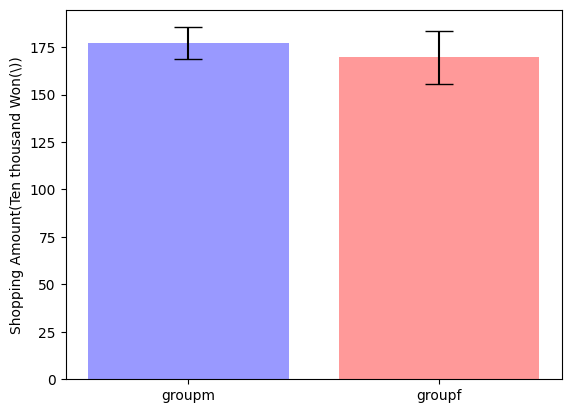

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
dfmale = df[df['성별'] == '남자']
m = np.mean(dfmale['쇼핑액'])
groupm = dfmale['쇼핑액']
conf_level = 0.95
dof = len(dfmale['쇼핑액']) - 1
alpha = 1 - conf_level

stderror = np.sqrt(np.var(dfmale['쇼핑액'])/len(dfmale['쇼핑액']))
marginerrorm = stats.t.ppf(1-alpha/2, dof) * stderror
conf_intervalm = (m - marginerrorm, m+marginerrorm)
print('남자 쇼핑액에 대한 신뢰구간(95%): ', end=''); print(conf_intervalm)

dffemale = df[df['성별'] == '여자']
f = np.mean(dffemale['쇼핑액'])
groupf = dffemale['쇼핑액']
conf_levelm = 0.95
dof = len(dffemale['쇼핑액']) - 1
alpha = 1 - conf_level

stderror = np.sqrt(np.var(dffemale['쇼핑액'])/len(dffemale['쇼핑액']))
marginerrorf = stats.t.ppf(1-alpha/2, dof) * stderror
conf_intervalf = (m - marginerrorf, m + marginerrorf)
print('여자 쇼핑액에 대한 신뢰구간(95%): ', end=''); print(conf_intervalf)

plt.bar(['groupm', 'groupf'], [m, f], color=['blue', 'red'], yerr=[marginerrorm, marginerrorf], capsize=10, alpha=0.4)
plt.ylabel('Shopping Amount(Ten thousand Won(\))')
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
print('성별="남자"인 쇼핑액의 평균(만원): ', end=''); print(np.mean(df[df['성별'] == '남자'].쇼핑액))
print('성별="여자"인 쇼핑액의 평균(만원): ', end=''); print(np.mean(df[df['성별'] == '여자'].쇼핑액))

dfmale = df[df['성별'] == '남자']
dffemale = df[df['성별'] == '여자']

t, pvalue = stats.ttest_ind(dfmale['쇼핑액'], dffemale['쇼핑액'], equal_var=False, alternative='less')
print('t-검정통계량: ', end=''); print(t)
print('유의확률: ', end=''); print(pvalue)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
성별="남자"인 쇼핑액의 평균(만원): 177.14181818181822
성별="여자"인 쇼핑액의 평균(만원): 169.5771428571429
t-검정통계량: 0.9236189788977162
유의확률: 0.8202250865877998


In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
print('성별="남자"인 쇼핑액의 평균(만원) : ', end=''); print(np.mean(df[df['성별'] == '남자'].쇼핑액))
print('성별="여자"인 쇼핑액의 평균(만원) : ', end=''); print(np.mean(df[df['성별'] == '여자'].쇼핑액))

dfmale = df[df['성별'] == '남자']
dffemale = df[df['성별'] == '여자']

t, pvalue = stats.ttest_ind(dfmale['쇼핑액'], dffemale['쇼핑액'], equal_var=False, alternative='greater')
print('t-검정통계량: ', end=''); print(t)
print('유의확률: ', end=''); print(pvalue)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
성별="남자"인 쇼핑액의 평균(만원) : 177.14181818181822
성별="여자"인 쇼핑액의 평균(만원) : 169.5771428571429
t-검정통계량: 0.9236189788977162
유의확률: 0.17977491341220025


In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
dfmale = df[df['성별'] == '남자']
dffemale = df[df['성별'] == '여자']
noofmale = len(dfmale)
nooffemale = len(dffemale)
print('남자의 인원수: ', end=''); print(noofmale)
print('여자의 인원수: ', end=''); print(nooffemale)
x1 = len(dfmale[dfmale['쿠폰선호도']=='예'])
x2 = len(dffemale[dffemale['쿠폰선호도']=='예'])
print('남자의 쿠폰선호도="예"인 인원수: ', end=''); print(x1)
print('여자의 쿠폰선호도="예"인 인원수: ', end=''); print(x2)
observed = [[[x1, x2], [noofmale-x1, nooffemale-x2]]]
print(observed)

chi, pvalue, dof, expect = stats.chi2_contingency(observed)
print('카이제곱 검정 통계량: ', end=''); print(chi)
print('pvalue(유의확률): ', end=''); print(pvalue)
print('기대 빈도수: '); print(expect)

alpha = 0.5
if pvalue < alpha:
  print("비율의 차이가 유의미하게 존재합니다. (귀무가설 기각)")
else:
  print("비율의 차이가 유의미하지 않습니다. (귀무가설 채택)")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
남자의 인원수: 55
여자의 인원수: 35
남자의 쿠폰선호도="예"인 인원수: 22
여자의 쿠폰선호도="예"인 인원수: 26
[[[22, 26], [33, 9]]]
카이제곱 검정 통계량: 8.771451762523188
pvalue(유의확률): 0.0030598180813934195
기대 빈도수: 
[[[29.33333333 18.66666667]
  [25.66666667 16.33333333]]]
비율의 차이가 유의미하게 존재합니다. (귀무가설 기각)


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)

df1 = df[df['주거지역']=='소도시'].쇼핑액
df2 = df[df['주거지역']=='중도시'].쇼핑액
df3 = df[df['주거지역']=='대도시'].쇼핑액
print(' 그룹(주거지역)별 기술통계량 ')
print(df1.describe()); print(df2.describe()); print(df3.describe())
group1 = df1.to_numpy(); group2 = df2.to_numpy(); group3 = df3.to_numpy()
print(' 그룹별 데이터 개수 ')
n1 = len(group1); n2 = len(group2); n3 = len(group3)
print(n1);print(n2);print(n3)
print('그룹별 쇼핑액 평균(만원)')
avg1 = np.mean(group1); avg2 = np.mean(group2); avg3 = np.mean(group3)
print(avg1);print(avg2);print(avg3)
print('그룹별 쇼핑액 분산')
var1 = np.var(group1, ddof=1); var2 = np.var(group2, ddof=1); var3 = np.var(group3, ddof=1)
print(var1);print(var2);print(var3)
Fstatistics, pvalue = stats.f_oneway(group1, group2, group3)
print('F-통계량 값: ', end=''); print(Fstatistics)
print('pvalue(유의확률): ', end=''); print(pvalue)
alpha = 0.05
if pvalue < alpha:
  print('귀무가설 기각: 그룹(주거지역)간 쇼핑액 (분산)차이가 다를 가능성이 있다.')
else:
  print( '귀무가설 채택: 그룹(주거지역)간 쇼핑액 (분산)차이가 다를 가능성이 낮다.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 그룹(주거지역)별 기술통계량 
count     30.000000
mean     167.680000
std       41.960297
min       80.400000
25%      147.300000
50%      169.200000
75%      195.000000
max      238.800000
Name: 쇼핑액, dtype: float64
count     24.000000
mean     178.500000
std       36.358648
min      111.600000
25%      158.700000
50%      172.800000
75%      205.800000
max      237.600000
Name: 쇼핑액, dtype: float64
count     36.000000
mean     176.766667
std       28.521250
min      112.800000
25%      159.300000
50%      176.400000
75%      195.600000
max      244.800000
Name: 쇼핑액, dtype: float64
 그룹별 데이터 개수 
30
24
36
그룹별 쇼핑액 평균(만원)
167.67999999999998
178.5
176.76666666666668
그룹별 쇼핑액 분산
1760.666482758621
1321.9513043478262
813.4617142857143
F-통계량 값: 0.7740556433121684
pvalue(유의확률): 0.46428841020338874
귀무가설 채택: 그룹(주거지역)간 쇼핑액 (분산)차이가 다를 가능성이 낮다.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
F-통계량 값: 0.7740556433121684
pvalue(유의확률): 0.46428841020338874


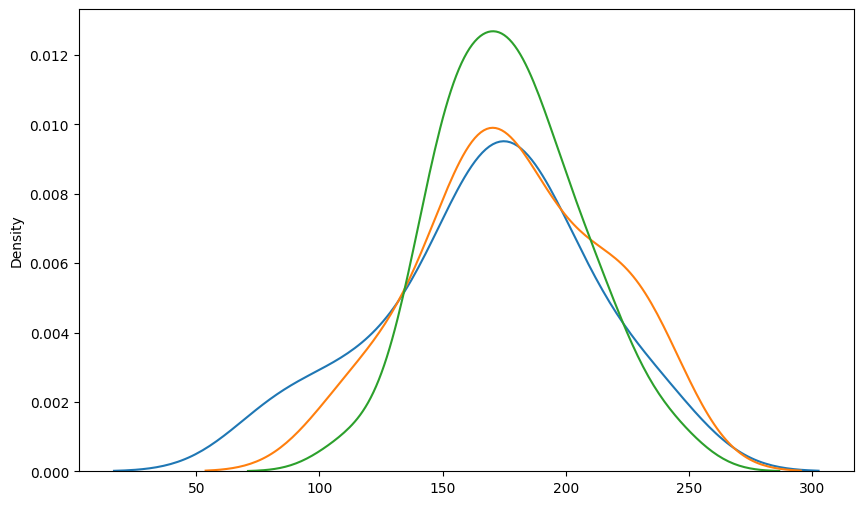

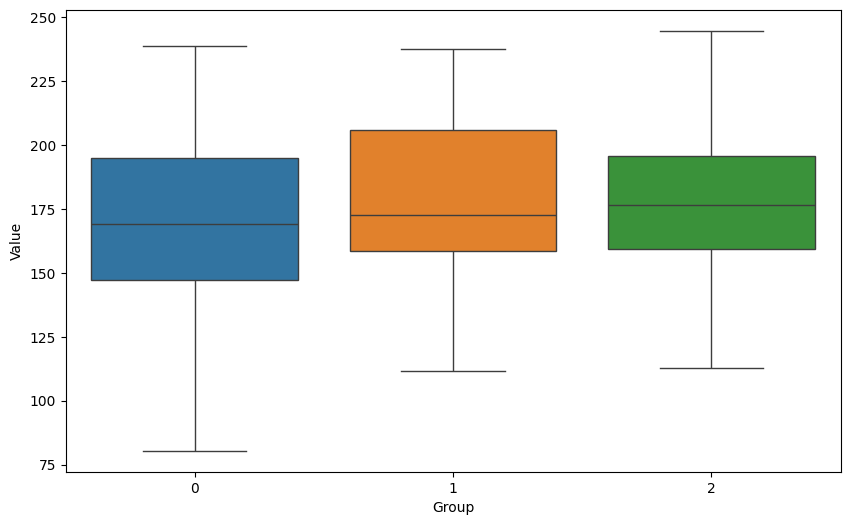

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
df1 = df[df['주거지역']=='소도시'].쇼핑액
df2 = df[df['주거지역']=='중도시'].쇼핑액
df3 = df[df['주거지역']=='대도시'].쇼핑액
group1 = df1.to_numpy(); group2=df2.to_numpy(); group3=df3.to_numpy()
Fstatistics, pvalue = stats.f_oneway(group1, group2, group3)
print('F-통계량 값: ', end=''); print(Fstatistics)
print('pvalue(유의확률): ', end=''); print(pvalue)

plt.rcParams['figure.figsize'] = (10,6)
sns.kdeplot(group1)
sns.kdeplot(group2)
sns.kdeplot(group3)
plt.show()

sns.boxplot(data=[group1, group2, group3])
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)
dfnew = df[['쇼핑1월', '쇼핑2월', '쇼핑3월']]
print(' 월별 쇼핑금액(만원) 기술통계량 ')
print(dfnew['쇼핑1월'].describe()); print(dfnew['쇼핑2월'].describe()); print(dfnew['쇼핑3월'].describe())
print(dfnew.head())
print('월별 데이터 개수(행)')
print(dfnew['쇼핑1월'].shape); print(dfnew['쇼핑2월'].shape); print(dfnew['쇼핑3월'].shape)
dfnew['month1'] = 1; dfnew['month2'] = 2; dfnew['month3'] = 3
d1 = dfnew[['쇼핑1월', 'month1']]
d1.rename(columns={'쇼핑1월':'value', 'month1':'month'}, inplace=True)
d2 = dfnew[['쇼핑2월', 'month2']]
d2.rename(columns={'쇼핑2월':'value', 'month2':'month'}, inplace=True)
d3 = dfnew[['쇼핑3월', 'month3']]
d3.rename(columns={'쇼핑3월':'value', 'month3':'month'}, inplace=True)
print('## 월별 쇼핑액 데이터##')
dtotal = pd.concat([d1, d2, d3], ignore_index=True)
print(dtotal.head())
print('분석대상 데이터프레임 크기(행, 열): ', end=''); print(dtotal.shape)
model = ols('value ~ C(month)', data=dtotal).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(' ANOVA 분석 결과 '); print(anova_table)
print('ANOVA 분석 F-통계량 값: ', end=''); print(anova_table.loc['C(month)']['F'])
print('ANOVA 분석 p-value: ', end=''); print(anova_table.loc['C(month)']['PR(>F)'])
alpha = 0.05
if anova_table.loc['C(month)']['PR(>F)'] < alpha:
  print('귀무가설 기각: 고객별로 그룹(월별쇼핑액)간 차이가 다를 가능성이 있다.')
else:
  print('귀무가설 채택: 고객별로 그룹(월별쇼핑액)간 차이가 다를 가능성이 낮다.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 월별 쇼핑금액(만원) 기술통계량 
count    90.000000
mean     64.973333
std      19.221528
min      15.600000
25%      52.800000
50%      64.800000
75%      80.100000
max      92.400000
Name: 쇼핑1월, dtype: float64
count    90.000000
mean     61.120000
std      17.848622
min      13.200000
25%      52.800000
50%      56.400000
75%      67.200000
max      92.400000
Name: 쇼핑2월, dtype: float64
count    90.000000
mean     48.106667
std      17.846668
min      13.200000
25%      38.700000
50%      52.800000
75%      52.800000
max      92.400000
Name: 쇼핑3월, dtype: float64
        쇼핑1월  쇼핑2월  쇼핑3월
고객번호                    
190105  76.8  64.8  54.0
190106  44.4  32.4  39.6
190107  66.0  66.0  51.6
190108  62.4  52.8  52.8
190109  63.6  54.0  51.6
월별 데이터 개수(행)
(90,)
(90,)
(90,)
## 월별 쇼핑액 데이터##
   value  month
0   76.8      1
1   44.4      1
2   66.0      1
3   62.4      1
4   63.6    